# Pandas 101
    

In [1]:
import pandas as pd
import numpy as np

## Read Files


In [165]:
df = pd.read_csv('C:\\Users\\LC\\Github Posting\\test.txt', delimiter = '\t')# read txt file in a specific directory.
df = pd.read_csv('test.csv', header=0) #read csv file / load csv file, with header
df = pd.read_excel('test.xlsx', sheet_name = 'Sheet2') # read excel file
df = pd.read_csv('C:\\Users\\LC\\Github Posting\\test.txt', delimiter = '\t') # Or use sep = '\t'
df = pd.read_csv('test.csv', header=None, nrows = 6) #read csv file / load csv file, no header, first n rows
df = pd.read_csv('test.csv',names=['newname1','newname2','newname3'],header = 0) # rename column names.Must use header=0
df=pd.read_csv('test.csv',names=['newname1','newname2'],index_col=0,header=0)#use a column as index/set index

na_dict = {'name': ['N/A', 'na'], 'id': ['NA']} # when it's 'N/A' OR 'na' in the 'name' column
df = pd.read_csv('test.csv',na_values = na_dict) # set certain cells as Nan
display(df)

,id,name,target
0,1,alice,100
1,2,bob,200
2,3,charles,300
3,4,david,400
4,5,edward,500
5,6,.,600
6,7,NaN,.


## Get all Columns Names

In [171]:
print(df.columns) #get list of column names

Index(['id', 'name', 'target'], dtype='object')


## View Dataframe Columns and Type

In [172]:
for col in df.columns:
    print(col + ": " + str(df[col].dtype)) # View Dataframe Columns and Type

id: int64
name: object
target: object


## Select

In [13]:
df.iloc[1:4, 0:2] #row 1:4, col 0:1
df.loc[df.index[2:4]] # by index 2:4

df = df[['id', 'name']] #select only certain columns / delete columns of remainings
df = df.filter(items=['id', 'name']) # select columns by column name #select only certain columns / delete columns of remainings
df=df.loc[df.index[2:4], ['id', 'name']] # select columns by column name, select rows by index

## Filter

In [42]:
df3 = df.dropna() #delete all Nan rows / delete all empty rows
df2 = df.dropna(subset=['name', 'target']) #delete all Nan rows in the specific columns

df = pd.read_csv('test.csv')
mylist=['alice', 'bob']
df4 = df[df['name'].isin(mylist)] # filter data by values (a list)
df4 = df[ (df['id'] >= 4) | (df['name'] =='alice')] #filter data by value
df4 = df[ (df['id'] >= 4) & (df['name'] =='alice')]

## Rename Column

In [140]:
df = pd.read_csv('test.csv')
df.columns = 'ID', 'Name', 'Target' # rename column names

df = df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'})# rename column names
df = df.rename({'oldName1': 'newName1', 'oldName2': 'newName2'}, axis=1)# rename column names

,id,name,target
0,1,alice,100


,ID,Name,target
0,1,alice,100


,id,name,target
0,1,alice,100


,ID,Name,target
0,1,alice,100


## Delete Column

In [8]:
df.drop(['id', 'name'], axis =1, inplace = True) #delete column
df.drop(columns = ['id', 'name'], inplace = True)#delete column
df = df[['id', 'name']].copy() #Create a new dataframe from existing dataframe. Another way to delete columns. 

## Column Calculation

In [252]:
df = pd.read_csv('test.csv', nrows = 2)
df.columns = 'col1', 'col2', 'col3' # rename column names

df['col4'] =  df['col1']/df['col3']
display(df)
df['col5'] = df['col1'].divide(df['col3'], fill_value=1) #substitute Nan value as 1 before division 
display(df)
df['col6'] = df['col1']/df['col3']
display(df)
df['col6'] = df['col1']**(df['col3']/10)
display(df)

,col1,col2,col3,col4
0,1,alice,100,0.01
1,2,bob,200,0.01


,col1,col2,col3,col4,col5
0,1,alice,100,0.01,0.01
1,2,bob,200,0.01,0.01


,col1,col2,col3,col4,col5,col6
0,1,alice,100,0.01,0.01,0.01
1,2,bob,200,0.01,0.01,0.01


,col1,col2,col3,col4,col5,col6
0,1,alice,100,0.01,0.01,1.0
1,2,bob,200,0.01,0.01,1048576.0


## Convert a column to array

In [253]:
# convert dataframe/convert df column to array
x = df.iloc[:,0].values # convert a single column (col #0) to array
myndarray = df.iloc[:, :] #convert the whole dataframe to ndarray. Header included. 
myarray = df.iloc[:,[0,1]].values #convert column 0 and 1 to ndarray. No header. 
x = df['col2'].as_matrix() #convert the 'Species' col to array
x = df['col2'].values

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


## Aggregation

In [192]:
df = pd.read_excel('test.xlsx', sheet_name = 'Sheet2') 
display(df)

df2 = df.groupby(['region','sub_region']).mean()
display(df2)

def meanskipna(df):
    return df.mean(skipna=True)
df3 = df.groupby(['region', 'sub_region'], as_index=False).agg({'actual': meanskipna, 'target': 'sum'})
display(df3)

df4 = df.groupby(['region', 'sub_region'], as_index=False).agg({'actual': meanskipna, 'target': ['min', 'max']})
display(df4)

,id,name,target,actual,increase,region,sub_region
0,1,alice,100,98.5,0.015,north,NW
1,2,bob,200,185.5,0.020,north,NE
2,3,charles,300,299.3,0.030,north,NW
3,4,david,400,400.5,-0.020,north,NE
4,5,edward,500,505.0,-0.040,west,SW
5,6,frank,600,655.0,0.035,west,SE
6,7,greg,700,680.9,0.040,west,SW


id  target  actual  increase
region sub_region                              
north  NE           3     300  293.00    0.0000
       NW           2     200  198.90    0.0225
west   SE           6     600  655.00    0.0350
       SW           6     600  592.95    0.0000

,region,sub_region,actual,target
0,north,NE,293.00,600
1,north,NW,198.90,400
2,west,SE,655.00,600
3,west,SW,592.95,1200


region sub_region     actual target     
                    meanskipna    min  max
0  north         NE     293.00    200  400
1  north         NW     198.90    100  300
2   west         SE     655.00    600  600
3   west         SW     592.95    500  700

## Sort


In [210]:
df = pd.read_excel('test.xlsx', sheet_name = 'Sheet2') 
df = df.sort_values(by=['increase', 'actual'], ascending = False, na_position='first')
display(df)
df = df.sort_index(by='increase', ascending = False)
display(df)

,id,name,target,actual,increase,region,sub_region
5,6,frank,600,655.0,0.035,west,SE
2,3,charles,300,299.3,0.030,north,NW
6,7,greg,700,680.9,0.020,west,SW
1,2,bob,200,185.5,0.020,north,NE
0,1,alice,100,98.5,0.015,north,NW
3,4,david,400,400.5,-0.020,north,NE
4,5,edward,500,505.0,-0.040,west,SW


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  after removing the cwd from sys.path.


,id,name,target,actual,increase,region,sub_region
5,6,frank,600,655.0,0.035,west,SE
2,3,charles,300,299.3,0.030,north,NW
6,7,greg,700,680.9,0.020,west,SW
1,2,bob,200,185.5,0.020,north,NE
0,1,alice,100,98.5,0.015,north,NW
3,4,david,400,400.5,-0.020,north,NE
4,5,edward,500,505.0,-0.040,west,SW


## Time Values

In [212]:
df = pd.read_csv(url, index_col = 0, parse_dates= True) #parse time series / date

## Merge / Join / Union

In [233]:
df1 = pd.read_excel('test.xlsx', sheet_name = 'Sheet1')
df2 = pd.read_excel('test.xlsx', sheet_name = 'Sheet2')
df= pd.merge(df1, df2,on=['name', 'name', 'id', 'id'] ) # inner join. Works but I don't like it. 
df = pd.merge(df1, df2, left_on=['name', 'id'], right_on = ['name', 'id'], how = 'inner') # inner join. You can also do right/left join
display(df)
df = pd.concat([df1, df2], sort = False).drop_duplicates()
display(df)

,id,name,consumption,target,actual,increase,region,sub_region
0,1,alice,844.0,100,98.5,0.015,north,NW
1,2,bob,166.0,200,185.5,0.020,north,NE
2,4,david,48.0,400,400.5,-0.020,north,NE
3,5,edward,206.0,500,505.0,-0.040,west,SW
4,7,greg,NaN,700,680.9,0.020,west,SW


,id,name,consumption,target,actual,increase,region,sub_region
0,1,alice,844.0,NaN,NaN,NaN,NaN,NaN
1,2,bob,166.0,NaN,NaN,NaN,NaN,NaN
2,4,david,48.0,NaN,NaN,NaN,NaN,NaN
3,5,edward,206.0,NaN,NaN,NaN,NaN,NaN
4,7,greg,NaN,NaN,NaN,NaN,NaN,NaN
0,1,alice,NaN,100.0,98.5,0.015,north,NW
1,2,bob,NaN,200.0,185.5,0.020,north,NE
2,3,charles,NaN,300.0,299.3,0.030,north,NW
3,4,david,NaN,400.0,400.5,-0.020,north,NE
4,5,edward,NaN,500.0,505.0,-0.040,west,SW


## Pivot / Melt 

    First, the DataFrame to melt.
    Second, identify variables to keep (Pandas will melt all of the other ones).
    Finally, a name for the new, melted variable.

In [ ]:
# Melt DataFrame
melted_df = pd.melt(df, 
                    id_vars=["Name", "Type 1", "Type 2"], # Variables to keep
                    var_name="Stat") # Name of melted variable

## Quick and Simple Plotting

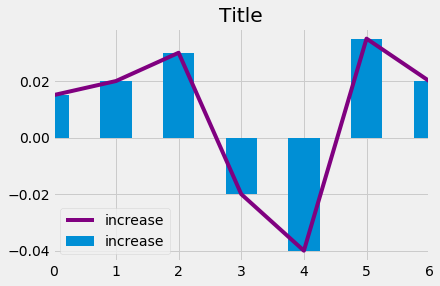

In [250]:
from matplotlib import pyplot as plt
df = pd.read_excel('test.xlsx', sheet_name = 'Sheet2')
plt.title('Title')
df['increase'].plot(kind = 'bar')
df['increase'].plot(kind = 'line', color = 'purple')
plt.legend(loc = 'lower left' )
plt.show()